<a href="https://colab.research.google.com/github/Aagnya-Mistry/Bias-Mitigation-in-ML-Models-for-Recidivism/blob/main/Model_accuracies_on_is_recid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas numpy shap fairlearn lime xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 2.5 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4d085730d75277b20043af8901346b0828014955b5909dba05c925bd1194c43a
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
!pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [ ]:
!wget https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv -P /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

--2025-03-26 18:06:41--  https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2546489 (2.4M) [text/plain]
Saving to: ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv’

compas-scores-two-y 100%[===================>]   2.43M  --.-KB/s    in 0.08s   

2025-03-26 18:06:42 (31.6 MB/s) - ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv’ saved [2546489/2546489]



In [ ]:
ls -lh /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

total 2.5M
-rw-r--r-- 1 root root 2.5M Mar 26 18:06 compas-scores-two-years.csv


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
# Define the file path
file_path = "/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [ ]:
df.shape

(7214, 53)

In [ ]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [ ]:
df["two_year_recid"].value_counts()

,count
two_year_recid,
0,3963
1,3251


In [ ]:
df["is_recid"].value_counts()

,count
is_recid,
0,3743
1,3471


In [ ]:
(df['two_year_recid']==df['is_recid']).value_counts()

,count
True,6994
False,220


### **Identifiers & Personal Information:**
1. **'id'** – Unique identifier for each individual in the dataset.  
2. **'name'** – Full name of the individual.  
3. **'first'** – First name of the individual.  
4. **'last'** – Last name of the individual.  
5. **'dob'** – Date of birth.  
6. **'sex'** – Gender of the individual (Male/Female).  
7. **'race'** – Ethnicity of the individual (e.g., African-American, Caucasian, etc.).  

In [ ]:
df = pd.get_dummies(df, columns=['race'], drop_first=False, dtype=int)

In [ ]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True, dtype=int)

In [ ]:
columns_to_drop = ['id','name','first','last','dob']

### **Demographic & Age Information:**
8. **'age'** – Age of the individual at the time of assessment.  
9. **'age_cat'** – Categorized age groups (e.g., 18-25, 26-45, 46+).  

In [ ]:
df['age_cat'].value_counts()

,count
age_cat,
25 - 45,4109
Greater than 45,1576
Less than 25,1529


In [ ]:
# Define age bins and labels
bins = [18, 25, 35, 45, float('inf')]  # 46+ uses infinity
labels = ['18-25', '26-35', '36-45', '46+']

# Create categorical age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [ ]:
df['age_group'].value_counts()

,count
age_group,
26-35,2581
18-25,1858
46+,1463
36-45,1309


In [ ]:
# Convert to one-hot encoding with prefix "age_"
df = pd.get_dummies(df, columns=['age_group'], prefix='age', dtype=int)

In [ ]:
df

,id,name,first,last,compas_screening_date,dob,age,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Male,age_18-25,age_26-35,age_36-45,age_46+
0,1,miguel hernandez,miguel,hernandez,2013-08-14,1947-04-18,69,Greater than 45,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0,0,0,0,0,1,1,0,0,0,1
1,3,kevon dixon,kevon,dixon,2013-01-27,1982-01-22,34,25 - 45,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1,0,0,0,0,0,1,0,1,0,0
2,4,ed philo,ed,philo,2013-04-14,1991-05-14,24,Less than 25,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1,1,0,0,0,0,0,1,1,0,0,0
3,5,marcu brown,marcu,brown,2013-01-13,1993-01-21,23,Less than 25,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,1,0,0,0,0,0,1,1,0,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,1973-01-22,43,25 - 45,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,1992-07-17,23,Less than 25,0,7,0,0,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,13016249CF10A,2013-11-22,NaN,1.0,F,Deliver Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,7,Medium,2013-11-23,Risk of Violence,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0,1,0,0,0,0,0,1,1,0,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,1993-03-25,23,Less than 25,0,3,0,0,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,14001422CF10A,2014-01-31,NaN,1.0,F,Leaving the Scene of Accident,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2014-02-01,Risk of Violence,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0,1,0,0,0,0,0,1,1,0,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,1958-10-01,57,Greater than 45,0,1,0,0,0,-1.0,2014-01-13 05:48:01,2014-01-14 07:49:46,14000581CF10A,2014-01-13,NaN,1.0,F,Aggravated Battery / Pregnant,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-01-14,Risk of Violence,1,Low,2014-01-14,2014-01-

In [ ]:
columns_to_drop += ['age', 'age_cat']

### **Criminal History & Prior Records:**
10. **'juv_fel_count'** – Number of juvenile felony convictions.  
11. **'juv_misd_count'** – Number of juvenile misdemeanor convictions.  
12. **'juv_other_count'** – Number of other juvenile offenses.  
13. **'priors_count'** – Total number of prior adult convictions.  

In [ ]:
# columns_to_drop += ['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']

### **Current Case Information:**
14. **'compas_screening_date'** – Date when the COMPAS risk assessment was conducted.  
15. **'c_case_number'** – Unique identifier for the individual's criminal case.  
16. **'c_offense_date'** – Date of the current offense.  
17. **'c_arrest_date'** – Date of the arrest for the current charge.  
18. **'c_charge_degree'** – Severity of the current charge (M = Misdemeanor, F = Felony).  
19. **'c_charge_desc'** – Description of the current charge (e.g., 'Grand Theft', 'Drug Possession').  
20. **'c_days_from_compas'** – Number of days between COMPAS assessment and the current case.  

In [ ]:
columns_to_drop += ['compas_screening_date','c_arrest_date','c_days_from_compas', 'c_case_number','c_offense_date', 'c_charge_desc']

In [ ]:
df['c_charge_desc'].value_counts()

,count
c_charge_desc,
Battery,1156
arrest case no charge,1137
Possession of Cocaine,474
Grand Theft in the 3rd Degree,425
Driving While License Revoked,200
...,...
Poss Pyrrolidinobutiophenone,1
Conspiracy Dealing Stolen Prop,1
Felony DUI - Enhanced,1


### Was testing to see if we could one hot encode c_charge_desc. Conclusion: Too unpredictable as a feature to predict recidivism. c_charge_degree is a good enough feature to keep


In [ ]:
# # Count total occurrences of each charge type
# charge_counts = df['c_charge_desc'].value_counts()

# # Filter out charge descriptions with fewer than 10 total cases
# valid_charges = charge_counts[charge_counts >= 10].index
# df_filtered = df[df['c_charge_desc'].isin(valid_charges)]

# # Recalculate total and recidivism cases for the filtered data
# charge_counts_filtered = df_filtered.groupby('c_charge_desc')['two_year_recid'].count()
# recid_counts_filtered = df_filtered.groupby('c_charge_desc')['two_year_recid'].sum()

# # Calculate recidivism percentage
# recid_percentage_filtered = (recid_counts_filtered / charge_counts_filtered) * 100

# # Get top 10 charge types with the highest recidivism percentage
# top_10_recid_filtered = recid_percentage_filtered.nlargest(10)

# # Display the result
# print(top_10_recid_filtered)

In [ ]:
# # Get top 30 most common charge descriptions
# top_30 = df['c_charge_desc'].value_counts().nlargest(30).index

# # Create binary columns with "c_charge_" prefix
# for charge in top_30:
#     df[f'c_charge_{charge}'] = (df['c_charge_desc'] == charge).astype(int)

# # Create "Other" column
# df['c_charge_Other'] = (~df['c_charge_desc'].isin(top_30)).astype(int)

# # Drop the original column
# df = df.drop(columns=['c_charge_desc'])

In [ ]:
df.groupby('two_year_recid')['c_charge_degree'].value_counts()

two_year_recid  c_charge_degree
0               F                  2384
                M                  1579
1               F                  2282
                M                   969
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['c_charge_degree'], drop_first=True, dtype=int)

### **Jail Custody Information:**
21. **'c_jail_in'** – Date the individual was jailed for the current offense.  
22. **'c_jail_out'** – Date the individual was released from jail for the current offense.

In [ ]:
df = df.dropna(subset=['c_jail_in', 'c_jail_out'])

In [ ]:
columns_to_drop += ['c_jail_in','c_jail_out']

### **Recidivism (Reoffense) Information:**
23. **'is_recid'** – 1 if the individual reoffended, 0 otherwise.  
24. **'two_year_recid'** – 1 if the individual reoffended within two years, 0 otherwise.  


In [ ]:
# columns_to_drop += ['is_recid']
# columns_to_drop += ['two_year_recid']

### **Reoffense Case Details:**
25. **'r_case_number'** – Case number for the recidivism offense.  
26. **'r_offense_date'** – Date of the reoffense.  
27. **'r_arrest_date'** – Date of arrest for the reoffense.  
28. **'r_days_from_arrest'** – Days between the original offense and the reoffense.  
29. **'r_charge_degree'** – Severity of the reoffense (M = Misdemeanor, F = Felony).  
30. **'r_charge_desc'** – Description of the reoffense charge.  
31. **'r_jail_in'** – Jail entry date for the reoffense.  
32. **'r_jail_out'** – Jail exit date for the reoffense.  

In [ ]:
columns_to_drop += ['r_case_number', 'r_offense_date', 'r_days_from_arrest', 'r_charge_degree', 'r_charge_desc', 'r_jail_in', 'r_jail_out']

### **Violent Recidivism Information:**
33. **'violent_recid'** – Number of times the individual has committed a violent reoffense.  
34. **'is_violent_recid'** – 1 if the individual committed a violent reoffense, 0 otherwise.  
35. **'vr_case_number'** – Case number for violent recidivism.  
36. **'vr_offense_date'** – Date of the violent reoffense.  
37. **'vr_charge_degree'** – Severity of the violent reoffense (M = Misdemeanor, F = Felony).  
38. **'vr_charge_desc'** – Description of the violent reoffense charge.  

In [ ]:
df['is_violent_recid'].value_counts()

,count
is_violent_recid,
0,6104
1,803


In [ ]:
df['vr_charge_degree'].value_counts()

,count
vr_charge_degree,
(M1),338
(F3),224
(F2),159
(F1),37
(M2),19
(F7),17
(MO3),5
(F6),3
(F5),1


In [ ]:
columns_to_drop += ['violent_recid', 'vr_case_number', 'vr_offense_date', 'vr_charge_degree', 'vr_charge_desc']

### **COMPAS Risk Assessment Scores:**
39. **'type_of_assessment'** – Type of risk assessment (e.g., General Recidivism, Violent Recidivism).  
40. **'decile_score'** – Risk score (1-10) predicting likelihood of recidivism.  
41. **'score_text'** – Categorical risk level based on 'decile_score' (Low, Medium, High).  
42. **'decile_score.1'** – Duplicate of 'decile_score'.  

In [ ]:
columns_to_drop += ['type_of_assessment','decile_score', 'score_text', 'decile_score.1']

### **Violent Recidivism Risk Scores:**
43. **'v_type_of_assessment'** – Type of assessment for violent recidivism.  
44. **'v_decile_score'** – Risk score (1-10) predicting violent reoffense.  
45. **'v_score_text'** – Categorical risk level for violent recidivism (Low, Medium, High).  
46. **'v_screening_date'** – Date of the violent recidivism assessment.  

In [ ]:
columns_to_drop += ['v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date']

### **Additional Features & Redundant Columns:**
47. **'days_b_screening_arrest'** – Days between arrest and COMPAS screening.  
48. **'priors_count.1'** – Duplicate of 'priors_count'.  
49. **'in_custody'** – Date when the person entered custody.  
50. **'out_custody'** – Date when the person left custody.  
51. **'start'** – Beginning of a time-based event (not clearly defined).  
52. **'end'** – End of a time-based event (not clearly defined).  
53. **'event'** – An unspecified event indicator.  


In [ ]:
df.groupby('two_year_recid')['event'].value_counts()

two_year_recid  event
0               0        3573
                1         138
1               1        2568
                0         628
Name: count, dtype: int64

In [ ]:
# df['total_prior_convictions'] = df['juv_fel_count'] + df['juv_misd_count'] + df['juv_other_count'] + df['priors_count']

In [ ]:
columns_to_drop += ['days_b_screening_arrest', 'priors_count.1','in_custody','out_custody','start','end','event']

In [ ]:
columns_to_drop

['id',
 'name',
 'first',
 'last',
 'dob',
 'age',
 'age_cat',
 'compas_screening_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_case_number',
 'c_offense_date',
 'c_charge_desc',
 'c_jail_in',
 'c_jail_out',
 'r_case_number',
 'r_offense_date',
 'r_days_from_arrest',
 'r_charge_degree',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'violent_recid',
 'vr_case_number',
 'vr_offense_date',
 'vr_charge_degree',
 'vr_charge_desc',
 'type_of_assessment',
 'decile_score',
 'score_text',
 'decile_score.1',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'days_b_screening_arrest',
 'priors_count.1',
 'in_custody',
 'out_custody',
 'start',
 'end',
 'event']

In [ ]:
df = df.drop(columns=columns_to_drop,axis=1)

In [ ]:
df = df.drop(columns = ['screening_date'])

In [ ]:
df.columns

Index(['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'is_recid', 'is_violent_recid', 'two_year_recid',
       'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other', 'sex_Male',
       'age_18-25', 'age_26-35', 'age_36-45', 'age_46+', 'c_charge_degree_M'],
      dtype='object')

In [ ]:
df.head()

,juv_fel_count,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,two_year_recid,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Male,age_18-25,age_26-35,age_36-45,age_46+,c_charge_degree_M
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0
2,0,0,1,4,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
6,0,0,0,14,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
df.shape

(6907, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6907 entries, 0 to 7213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   juv_fel_count          6907 non-null   int64
 1   juv_misd_count         6907 non-null   int64
 2   juv_other_count        6907 non-null   int64
 3   priors_count           6907 non-null   int64
 4   is_recid               6907 non-null   int64
 5   is_violent_recid       6907 non-null   int64
 6   two_year_recid         6907 non-null   int64
 7   race_African-American  6907 non-null   int64
 8   race_Asian             6907 non-null   int64
 9   race_Caucasian         6907 non-null   int64
 10  race_Hispanic          6907 non-null   int64
 11  race_Native American   6907 non-null   int64
 12  race_Other             6907 non-null   int64
 13  sex_Male               6907 non-null   int64
 14  age_18-25              6907 non-null   int64
 15  age_26-35              6907 non-null   int6

### Visualizing overlap between features and targets

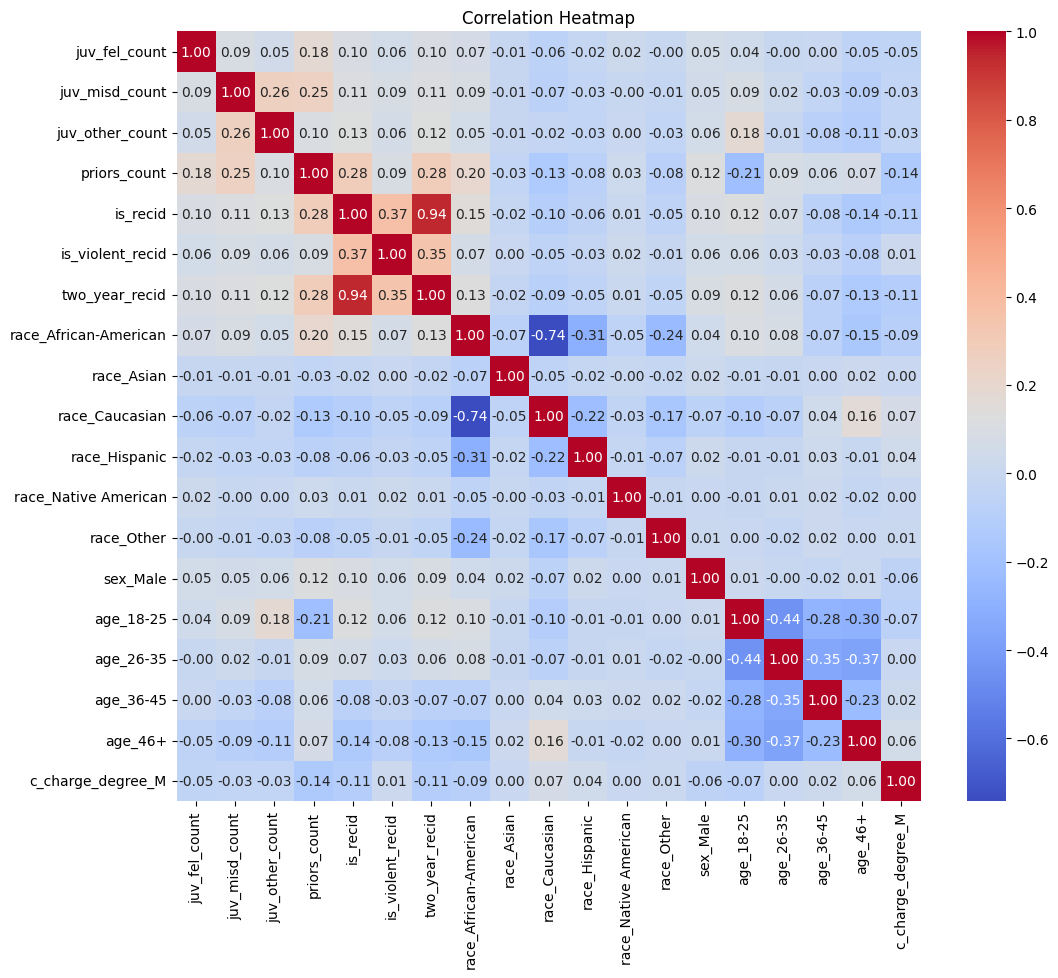

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

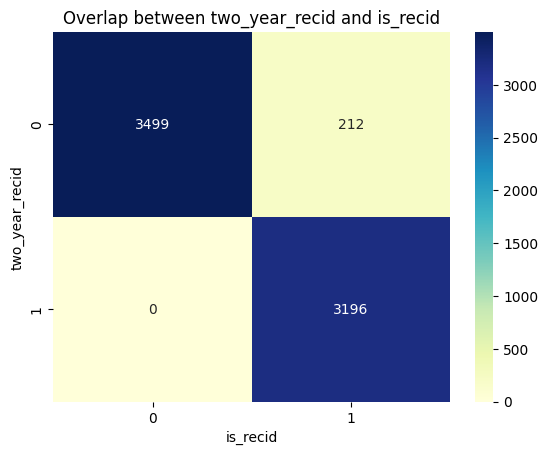

In [ ]:
import seaborn as sns

# Create a crosstab to count occurrences
conf_matrix = pd.crosstab(df['two_year_recid'], df['is_recid'],
                          rownames=['two_year_recid'], colnames=['is_recid'])

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Overlap between two_year_recid and is_recid")
plt.xlabel("is_recid")
plt.ylabel("two_year_recid")
plt.show()

In [ ]:
df['is_violent_recid'].value_counts()

,count
is_violent_recid,
0,6104
1,803


### Train Test Split

In [ ]:
X = df.drop(columns=['two_year_recid', 'is_recid', 'is_violent_recid'],axis=1)

In [ ]:
y = df['is_recid']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Importing Models
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Importing Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# XGBoost

In [ ]:
model_1 = xgb.XGBClassifier(random_state=42)
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model_1.predict(X_test)

Accuracy: 0.658465991316932
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.74      0.68       688
           1       0.69      0.57      0.63       694

    accuracy                           0.66      1382
   macro avg       0.66      0.66      0.66      1382
weighted avg       0.66      0.66      0.66      1382

Confusion Matrix:
 [[511 177]
 [295 399]]


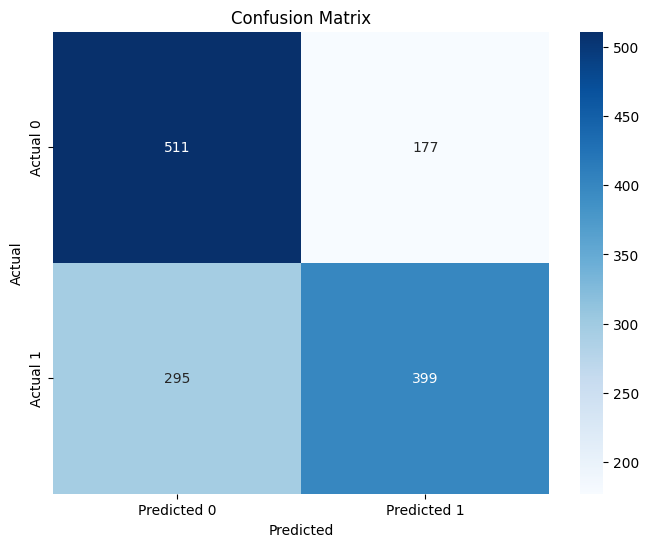

In [ ]:
# prompt: calculate accuracy, classification report and confusion matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best XGBoost Parameters: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Accuracy with Best XGBoost Parameters: 0.6772793053545586
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.74      0.69       688
           1       0.70      0.62      0.66       694

    accuracy                           0.68      1382
   macro avg       0.68      0.68      0.68      1382
weighted avg       0.68      0.68      0.68      1382

Confusion Matrix:
 [[506 182]
 [264 430]]


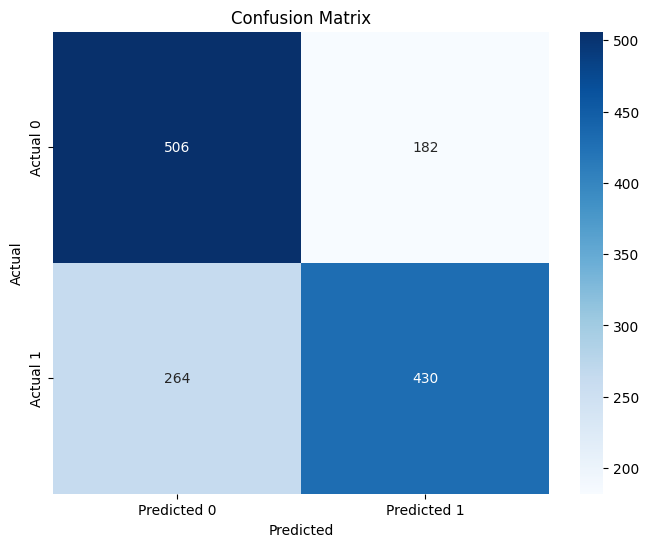

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(model_1, xgb_param_grid, scoring='accuracy', n_iter=20, cv=5, n_jobs=-1, random_state=42)
xgb_search.fit(X_train, y_train)

# Print best parameters
print("Best XGBoost Parameters:", xgb_search.best_params_)
best_xgb = xgb_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy with Best XGBoost Parameters: {accuracy_xgb}")

class_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", class_report_xgb)

# Generate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
model_2 = SVC(random_state=42)
model_2.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred_2 = model_2.predict(X_test)

Accuracy: 0.6620839363241678
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.78      0.70       688
           1       0.72      0.54      0.62       694

    accuracy                           0.66      1382
   macro avg       0.67      0.66      0.66      1382
weighted avg       0.67      0.66      0.66      1382

Confusion Matrix:
 [[538 150]
 [317 377]]


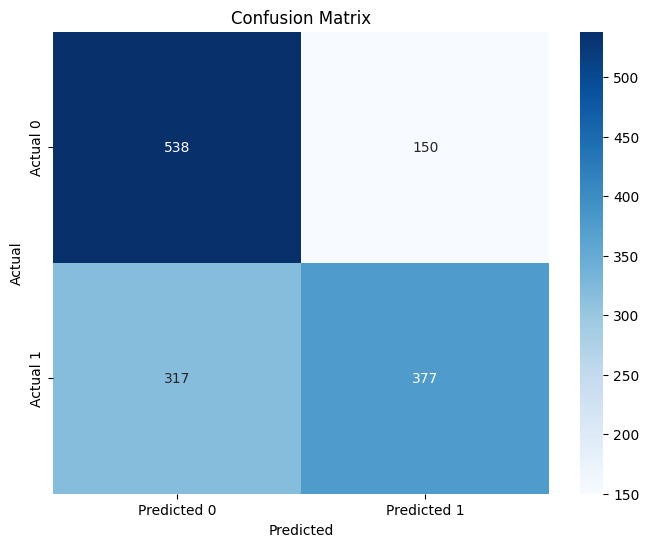

In [ ]:
# prompt: calculate accuracy, classification report and confusion matrix

# Calculate accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy_2}")

# Generate classification report
class_report_2 = classification_report(y_test, y_pred_2)
print("Classification Report:\n", class_report_2)

# Generate confusion matrix
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:\n", conf_matrix_2)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best SVM Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
Accuracy with Best SVM Parameters: 0.6700434153400868
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69       688
           1       0.71      0.59      0.64       694

    accuracy                           0.67      1382
   macro avg       0.68      0.67      0.67      1382
weighted avg       0.68      0.67      0.67      1382

Confusion Matrix:
 [[518 170]
 [286 408]]


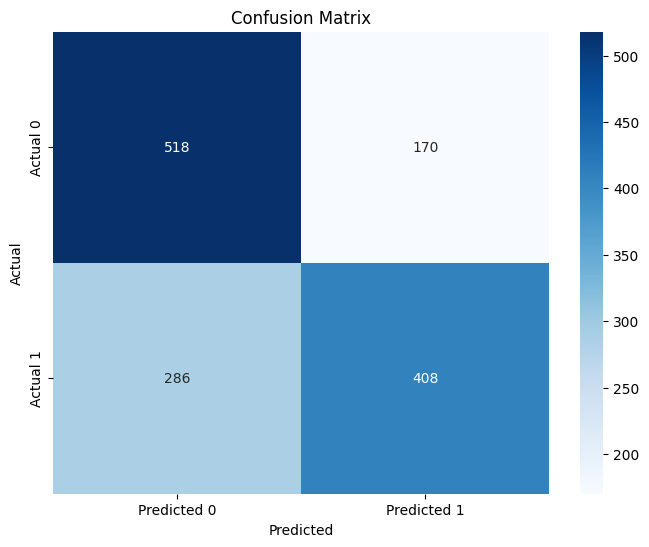

In [ ]:
from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV

svm_param_dist = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Use RandomizedSearchCV for random sampling of hyperparameters
svm_search = RandomizedSearchCV(model_2, svm_param_dist, n_iter=10, scoring='accuracy', cv=3,
                                n_jobs=-1, random_state=42)  # n_iter controls the number of random trials

svm_search.fit(X_train, y_train)

# Print best parameters
print("Best SVM Parameters:", svm_search.best_params_)
best_svc = svm_search.best_estimator_

# Make predictions
y_pred_svm = best_svc.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy with Best SVM Parameters: {accuracy_svm}")

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", class_report_svm)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(random_state=42)
model_3.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_3 = model_3.predict(X_test)

Accuracy: 0.6751085383502171
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       688
           1       0.70      0.63      0.66       694

    accuracy                           0.68      1382
   macro avg       0.68      0.68      0.67      1382
weighted avg       0.68      0.68      0.67      1382

Confusion Matrix:
 [[497 191]
 [258 436]]


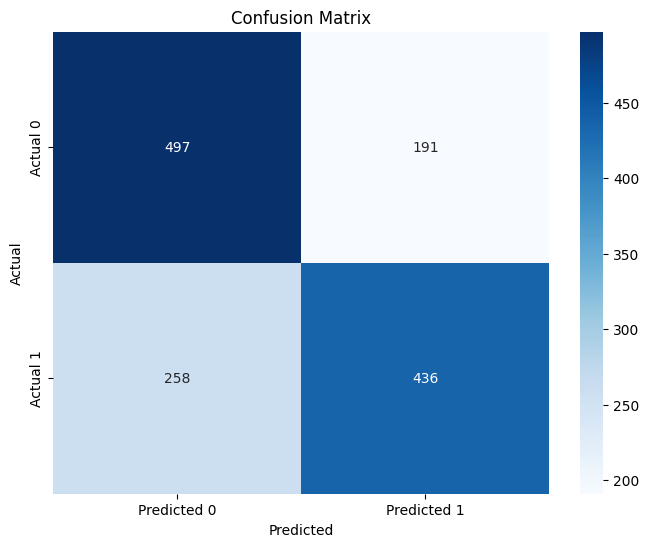

In [ ]:
# Calculate accuracy
accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Accuracy: {accuracy_3}")

# Generate classification report
class_report_3 = classification_report(y_test, y_pred_3)
print("Classification Report:\n", class_report_3)

# Generate confusion matrix
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)
print("Confusion Matrix:\n", conf_matrix_3)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best Parameters: {'solver': 'saga', 'C': np.float64(0.01)}
Test Accuracy: 0.6685962373371924
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69       688
           1       0.70      0.59      0.64       694

    accuracy                           0.67      1382
   macro avg       0.67      0.67      0.67      1382
weighted avg       0.67      0.67      0.67      1382



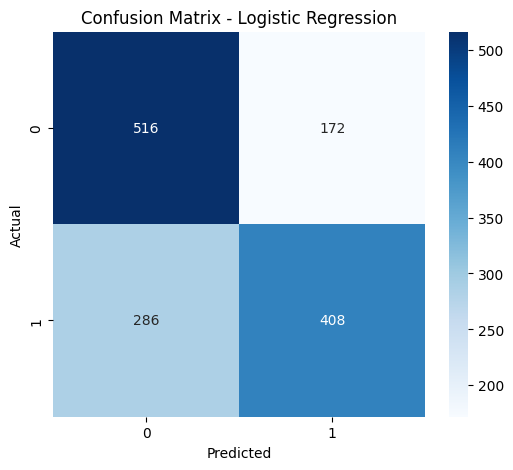

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define valid hyperparameter grid
param_dist = {
    'C': np.logspace(-2, 2, 5),  # Regularization strength
    'solver': ['liblinear', 'saga']  # Compatible solvers
}

# Define logistic regression model
model = LogisticRegression(random_state=42)

# Perform Randomized Search for tuning
logreg_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=5,  # Reduced iterations
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Fit model
logreg_search.fit(X_train, y_train)

# Get best model
best_logreg = logreg_search.best_estimator_

# Evaluate performance
y_pred = best_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", logreg_search.best_params_)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Gradient Boosted Decision Trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_4 = GradientBoostingClassifier(random_state=42)
model_4.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_4 = model_4.predict(X_test)

Accuracy: 0.6700434153400868
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69       688
           1       0.69      0.61      0.65       694

    accuracy                           0.67      1382
   macro avg       0.67      0.67      0.67      1382
weighted avg       0.67      0.67      0.67      1382

Confusion Matrix:
 [[501 187]
 [269 425]]


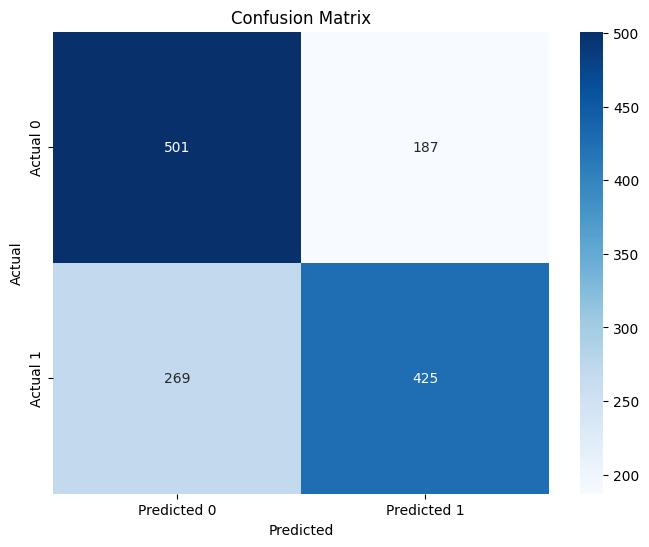

In [ ]:
# Calculate accuracy
accuracy_4 = accuracy_score(y_test, y_pred_4)
print(f"Accuracy: {accuracy_4}")

# Generate classification report
class_report_4 = classification_report(y_test, y_pred_4)
print("Classification Report:\n", class_report_4)

# Generate confusion matrix
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)
print("Confusion Matrix:\n", conf_matrix_4)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best Gradient Boosting Parameters: {'subsample': 0.6, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.1}
Accuracy with Best Gradient Boosting Parameters: 0.6729377713458755
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.74      0.69       688
           1       0.70      0.61      0.65       694

    accuracy                           0.67      1382
   macro avg       0.68      0.67      0.67      1382
weighted avg       0.68      0.67      0.67      1382

Confusion Matrix:
 [[510 178]
 [274 420]]


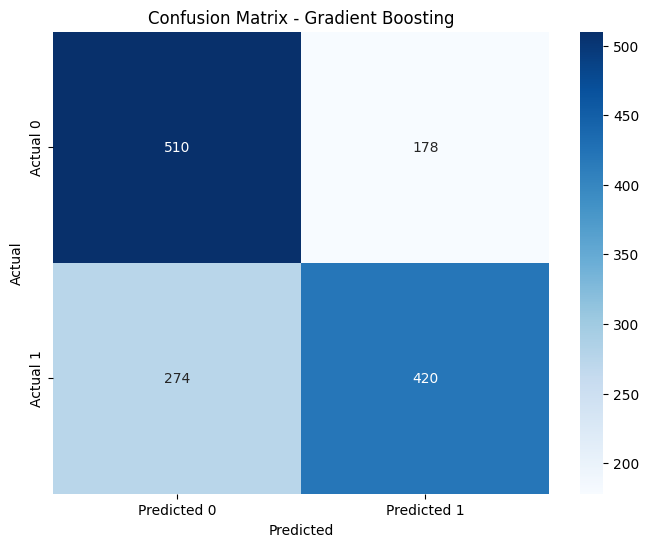

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter distribution for Gradient Boosting
gbdt_param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5, 6],  # Maximum depth of individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'subsample': [0.6, 0.8, 1.0]  # Fraction of samples used for fitting estimators
}

# Use RandomizedSearchCV for hyperparameter tuning
gbdt_search = RandomizedSearchCV(model_4, gbdt_param_dist, n_iter=10, scoring='accuracy', cv=3,
                                 n_jobs=-1, random_state=42)

gbdt_search.fit(X_train, y_train)

# Print best parameters
print("Best Gradient Boosting Parameters:", gbdt_search.best_params_)
best_gbdt = gbdt_search.best_estimator_

# Make predictions
y_pred_gbdt = best_gbdt.predict(X_test)
accuracy_gbdt = accuracy_score(y_test, y_pred_gbdt)
print(f"Accuracy with Best Gradient Boosting Parameters: {accuracy_gbdt}")

# Generate classification report
class_report_gbdt = classification_report(y_test, y_pred_gbdt)
print("Classification Report:\n", class_report_gbdt)

# Generate confusion matrix
conf_matrix_gbdt = confusion_matrix(y_test, y_pred_gbdt)
print("Confusion Matrix:\n", conf_matrix_gbdt)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbdt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()